In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
A11 = np.array([[0.4, 0.2], [0.1, 0.2]])
A12 = np.array([[0.3, 0.2]]).T
A21 = np.array([[0.2, 0.3]])
A22 = np.array([0.5])

B1 = np.array([[0.2, 0.3], [0.7, 0.8]])
B2 = np.array([[0.1, 0]]).T

x1_0 = np.array([[5000, 2400]]).T


def c1(t): return np.array([1000, 400]) * np.exp(0.05*t)


c2 = 200


In [13]:
bounds = [0, 1]
t = np.linspace(*bounds, 100)

A22_neg_inv = np.linalg.inv(np.eye(1) - A22)
A1 = A11 + A12 @ A22_neg_inv @ A21
B = B1 + B2 @ A22_neg_inv @ A21


def c(t):
    return c1(t) - np.dot(A22_neg_inv.T, A12.T).reshape(A12.shape[0]) * c2

[[-13.33333333   6.        ]
 [ 11.66666667  -4.        ]]
[[-5.85333333 -3.14666667]
 [ 5.34666667  3.15333333]]
[array([-9813.33333333,  8986.66666667]), array([-9818.85661351,  8991.75212585]), array([-9824.38268392,  8996.84015409]), array([-9829.91154598,  9001.9307527 ]), array([-9835.4432011 ,  9007.02392296]), array([-9840.97765069,  9012.11966619]), array([-9846.51489617,  9017.21798367]), array([-9852.05493894,  9022.31887671]), array([-9857.59778042,  9027.4223466 ]), array([-9863.14342202,  9032.52839466]), array([-9868.69186515,  9037.63702218]), array([-9874.24311124,  9042.74823047]), array([-9879.7971617 ,  9047.86202083]), array([-9885.35401794,  9052.97839456]), array([-9890.91368138,  9058.09735298]), array([-9896.47615344,  9063.21889738]), array([-9902.04143554,  9068.34302907]), array([-9907.6095291 ,  9073.46974936]), array([-9913.18043554,  9078.59905955]), array([-9918.75415628,  9083.73096096]), array([-9924.33069274,  9088.8654549 ]), array([-9929.91004634,  

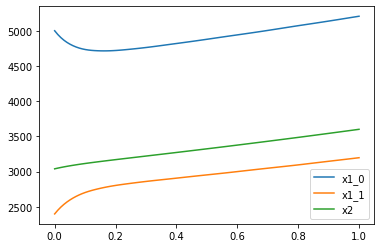

In [14]:
# general

B_inv = np.linalg.inv(B)
A1_neg_inv = np.linalg.inv(np.eye(A1.shape[0]) - A1)


def x_der(t, x):
    return B_inv @ x - B_inv @ A1 @ x - B_inv @ c(t)

print(B_inv)
print(B_inv @ A1)
print([B_inv @ c(t_) for t_ in t])

x1 = solve_ivp(x_der, bounds, x1_0.reshape(2), t_eval=t).y
x2 = A22_neg_inv @ (A21 @ x1 - c2)

plt.plot(t, x1[0], t, x1[1], t, x2[0])
plt.legend(['x1_0', 'x1_1', 'x2'])
plt.show()

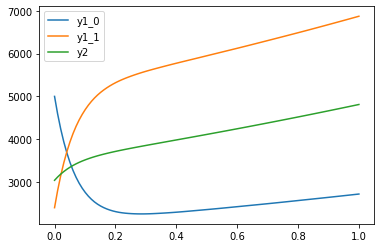

In [15]:
# closed

def y_der(t, y):
    return (np.eye(A1.shape[0]) - A1) @ B_inv @ y


G = B_inv @ (np.eye(A1.shape[0]) - A1) 
 
y1 = solve_ivp(y_der, bounds, x1_0.reshape(2), t_eval=t).y
y2 = A22_neg_inv @ (A21 @ y1 - c2)
# print("y1:",y1)
# print("y2:",y2)
plt.plot(t, y1[0], t, y1[1], t, y2[0])
plt.legend(['y1_0', 'y1_1', 'y2'])
plt.show()

In [16]:
G

array([[-7.48      ,  9.14666667],
       [ 6.32      , -7.15333333]])

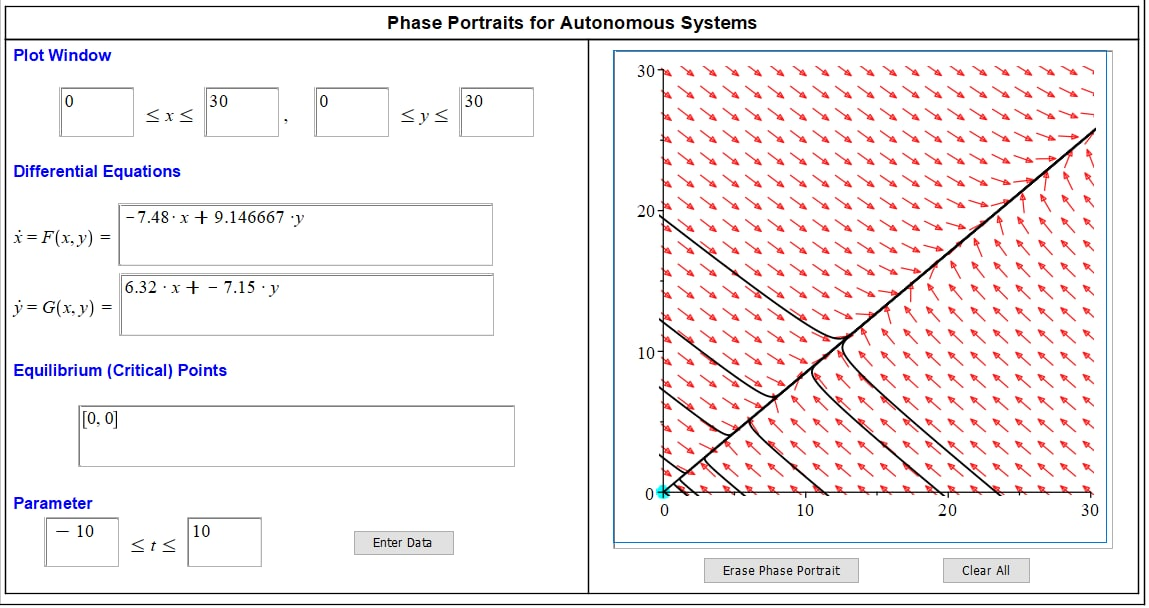

[[-0.7325892  -0.36788482]
 [ 0.68067104 -0.92987137]]
[-0.06701736  3.47011813]
Technology growth factor: 0.29


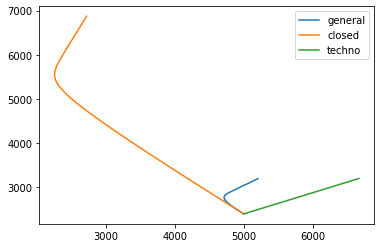

In [17]:
# tech growth factor

matrix = B @ A1_neg_inv
eigen_values, _ = np.linalg.eig(a=matrix)
print(_)
print(eigen_values)

tech_growth = 1.0 / np.max(eigen_values)
print('Technology growth factor: {:.2f}'.format(tech_growth))

st = np.exp(tech_growth * t)

plt.plot(x1[0], x1[1])
plt.plot(y1[0], y1[1])
plt.plot(st * 5000, st * 2400)
plt.legend(['general', 'closed', 'techno'])
plt.show()